In [3]:
import networkx as nx

In [4]:
#1. Finding hubs

Graph with 143 nodes and 623 edges


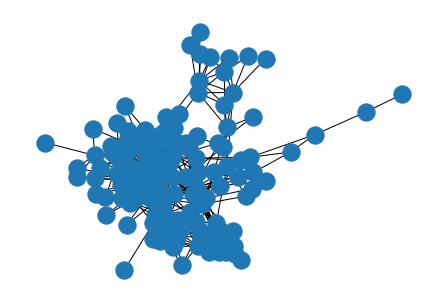

In [5]:
G=nx.read_edgelist('../datasets/ia-enron-only.edges',nodetype=int)
print(nx.info(G))
nx.draw(G)

In [6]:
max([1,2,3,4,5])

5

In [7]:
max(['apple','grape','carrot'],key=len)

'carrot'

In [8]:
max_node=max(G.nodes,key=G.degree)
max_node

105

In [9]:
G.degree(max_node)

42

In [10]:
betweenness=nx.centrality.betweenness_centrality(G)
heighst_betweenness=max(G.nodes,key=betweenness.get)
heighst_betweenness

105

In [11]:
betweenness[heighst_betweenness]

0.19400604344556296

In [12]:
#2. Centrality distributions

In [13]:
degree_seq=[G.degree(n) for n in G.nodes]

In [14]:
import statistics
print ('Mean: ',statistics.mean(degree_seq))
print('Median: ',statistics.median(degree_seq))

Mean:  8.713286713286713
Median:  8


In [15]:
betweenness=nx.centrality.betweenness_centrality(G)
betweenness_seq=list(betweenness.values())
print ('Mean betweenness: ',statistics.mean(betweenness_seq))
print('Median betweenness: ',statistics.median(betweenness_seq))


Mean betweenness:  0.013950388838012454
Median betweenness:  0.0037492834763570323


In [16]:
from collections import Counter
deg_counts=Counter(degree_seq)
deg_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [17]:
min_deg,max_deg=min(deg_counts.keys()),max(deg_counts.keys())
plot_x=list(range(min_deg,max_deg+1))
plot_y=[deg_counts.get(x,0) for x in plot_x]

<BarContainer object of 42 artists>

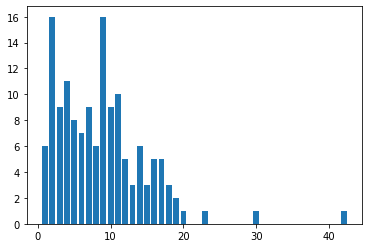

In [18]:
import matplotlib.pyplot as plt
plt.bar(plot_x,plot_y)

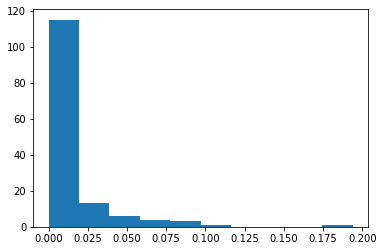

In [19]:
counts,bins,patches=plt.hist(betweenness_seq,bins=10)

In [20]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [21]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

In [22]:
#3. Testing robustness

In [23]:
nx.connected_components(G)

<generator object connected_components at 0x00000271F74E24A0>

In [24]:
core=next(nx.connected_components(G))
core

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143}

In [25]:
len(core)

143

In [26]:
components=list(nx.connected_components(G))

In [27]:
len(components)

1

In [28]:
C=G.copy()

In [29]:
import random
nodes_to_rmv=random.sample(list(C.nodes),2)
C.remove_nodes_from(nodes_to_rmv)

In [42]:
stps=25
M=G.number_of_nodes()//stps
M

5

In [43]:
num_rmv_nodes=range(0,G.number_of_nodes(),M)

In [44]:
N=G.number_of_nodes()
C=G.copy()
rndm_attack_props=[]
for nodes_remvd in num_rmv_nodes:
    core=next(nx.connected_components(C))
    core_prop=len(core)/N
    rndm_attack_props.append(core_prop)
    if C.number_of_nodes()>M:
        nodes_to_rmv=random.sample(list(C.nodes),M)
        C.remove_nodes_from(nodes_to_rmv)

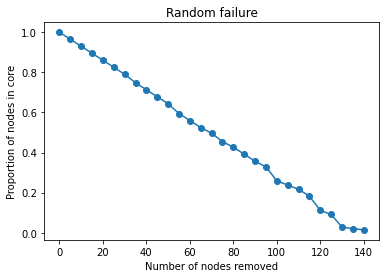

In [45]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_rmv_nodes,rndm_attack_props, marker='o')

In [46]:
nodes_sorted_by_degree=sorted(G.nodes,key=G.degree,reverse=True)
top_degree_nodes=nodes_sorted_by_degree[:M]
top_degree_nodes 

[105, 17, 95, 48, 132]

In [47]:
N=G.number_of_nodes()
stps=25
M=N//stps
num_nods_rmvd=range(0,N,M)
C=G.copy()
targtd_attack_props=[]
for nodes_rmvd in num_nods_rmvd:
    core=next(nx.connected_components(C))
    core_prop=len(core) / N
    targtd_attack_props.append(core_prop)
    if C.number_of_nodes()>M:
        nodes_sorted_by_degree=sorted(C.nodes,key=C.degree,reverse=True)
        nodes_to_rmv=nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_rmv)

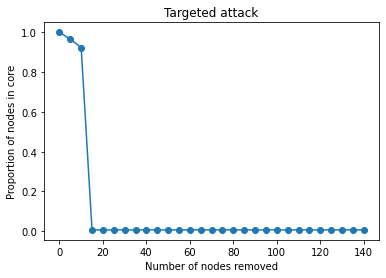

In [48]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nods_rmvd,targtd_attack_props,marker='o')

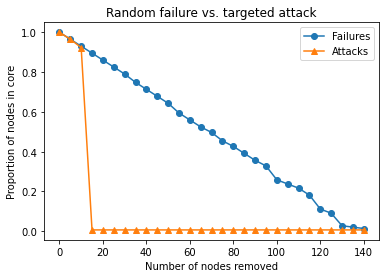

In [49]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_rmv_nodes,rndm_attack_props, marker='o', label='Failures')
plt.plot(num_nods_rmvd,targtd_attack_props,marker='^', label='Attacks')
plt.legend()